In [ ]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(
    r"data\Pecém_Solcast_energy_2023_60min.CSV", 
    sep=";",
    skiprows=11,
    encoding='latin-1',
    index_col=0,
    decimal=","
    )

df

,kW
,
01/01/23 00:00,-4.3983
01/01/23 01:00,-4.3983
01/01/23 02:00,-4.3983
01/01/23 03:00,-4.3983
01/01/23 04:00,-4.3983
...,...
31/12/23 19:00,-4.3983
31/12/23 20:00,-4.3983
31/12/23 21:00,-4.3983


In [3]:
df=df.rename(columns={"kW":"ENERGIA"})

df/=1000

df=df.applymap(lambda x:0 if x<0 else x)
df.describe()

df.index=pd.to_datetime(df.index,format="%d/%m/%y %H:%M")
df.index

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ENERGIA  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


C:\Users\ferre\AppData\Local\Temp\ipykernel_22180\1848140279.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x:0 if x<0 else x)


<Axes: xlabel='    '>

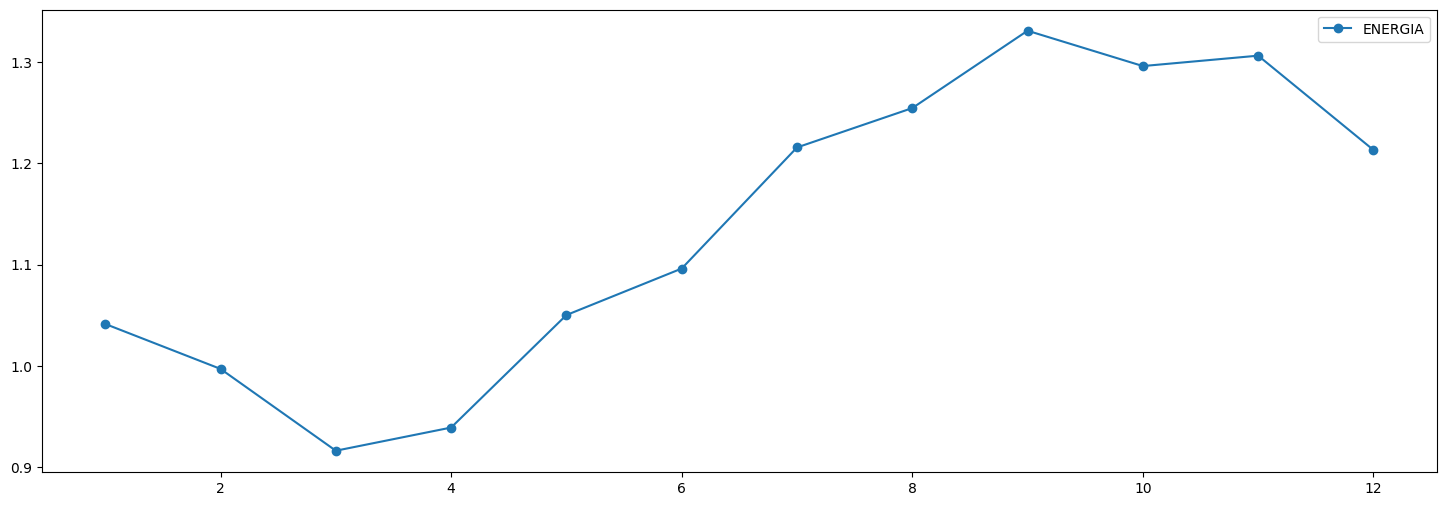

In [4]:
medias_mensais=df.groupby(df.index.month).mean()

medias_mensais.plot(figsize=(18,6),marker="o")


<Axes: xlabel='    '>

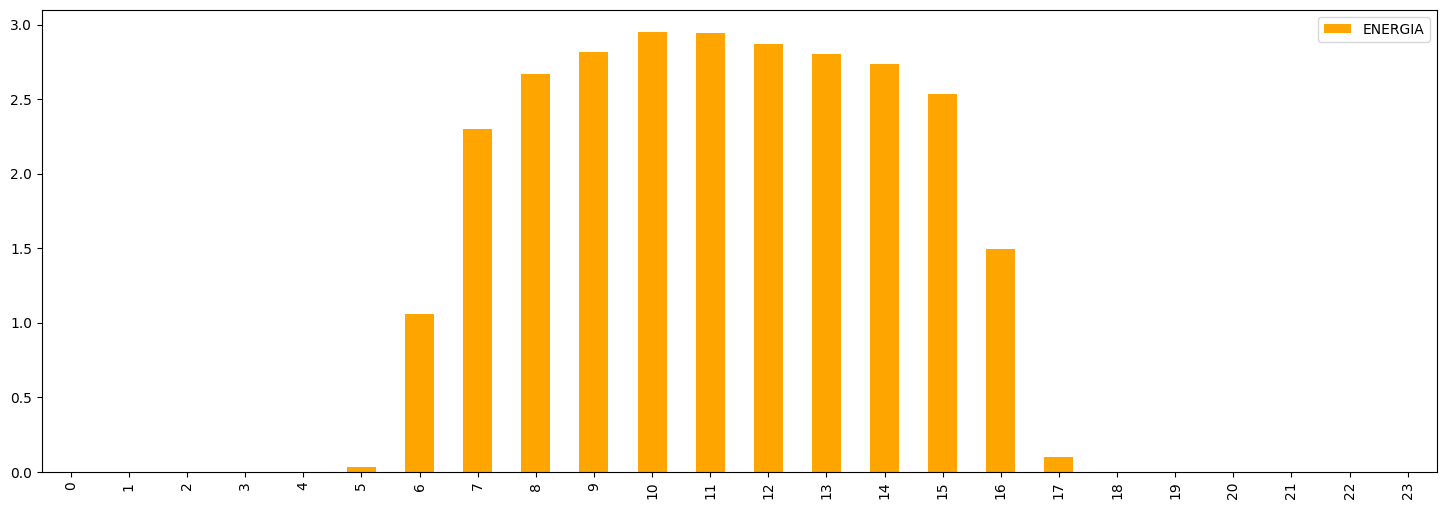

In [5]:
medias_horarias=df.groupby(df.index.hour).mean()

medias_horarias.plot(figsize=(18,6), kind="bar", color="orange")

In [6]:
medias_mensais.to_excel("results/mediasmensais.xlsx")

In [7]:
df['Season'] = df.index.month.map({12: 'Verão', 1: 'Verão', 2: 'Verão', 
                                  3: 'Outono', 4: 'Outono', 5: 'Outono',
                                  6: 'Inverno', 7: 'Inverno', 8: 'Inverno',
                                  9: 'Primavera', 10: 'Primavera', 11: 'Primavera'})

medias_sazonais = df.groupby('Season')['ENERGIA'].mean()
print("Médias por estação:")
print(medias_sazonais)

# Análise de eficiência por mês
df['Dia'] = df.index.date
producao_diaria = df.groupby('Dia')['ENERGIA'].sum()
producao_mensal = df.groupby(df.index.month)['ENERGIA'].sum()

print(f"Total anual produzido: {df['ENERGIA'].sum():.2f} MWh")
print(f"Mês mais produtivo: {producao_mensal.idxmax()} - {producao_mensal.max():.2f} MWh")

Médias por estação:
Season
Inverno      1.189682
Outono       0.968740
Primavera    1.310824
Verão        1.086660
Name: ENERGIA, dtype: float64
Total anual produzido: 9975.82 MWh
Mês mais produtivo: 10 - 964.18 MWh


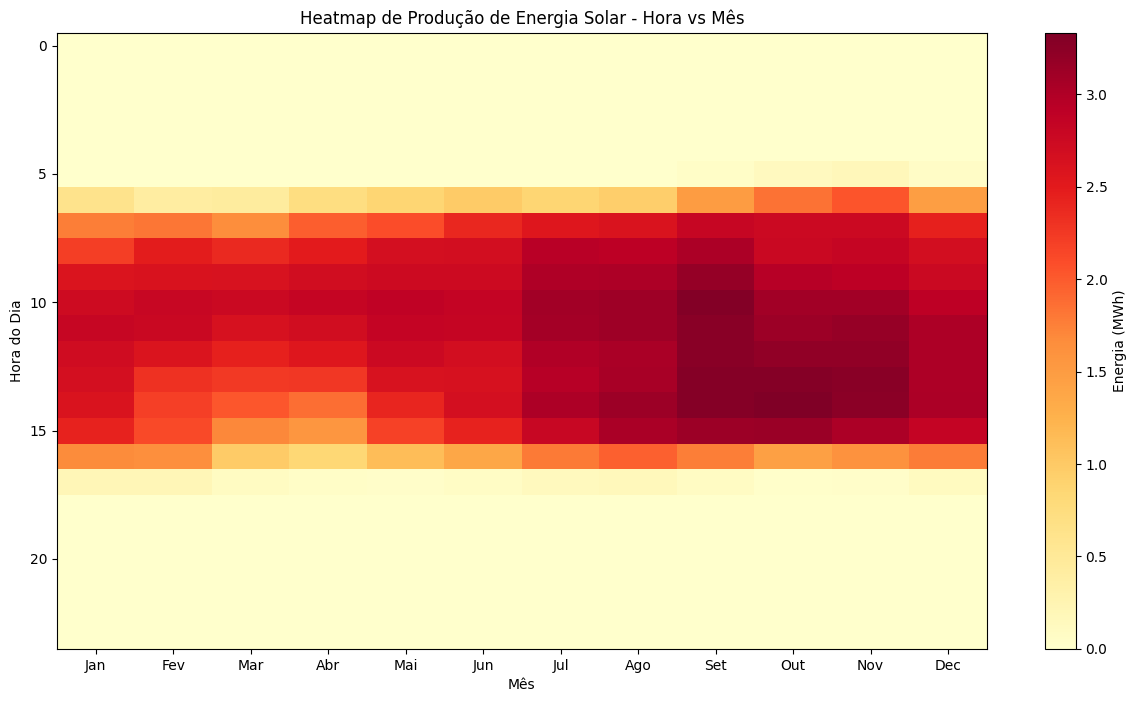

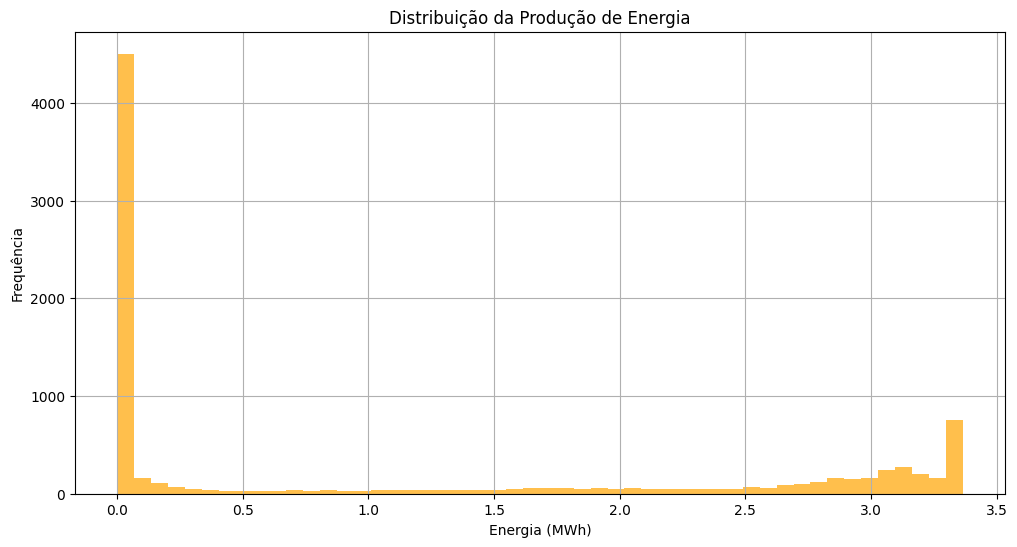

In [8]:
import matplotlib.pyplot as plt

# Heatmap de produção (hora x mês)
pivot_table = df.pivot_table(values='ENERGIA', 
                            index=df.index.hour, 
                            columns=df.index.month, 
                            aggfunc='mean')

plt.figure(figsize=(15, 8))
plt.imshow(pivot_table, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Energia (MWh)')
plt.title('Heatmap de Produção de Energia Solar - Hora vs Mês')
plt.xlabel('Mês')
plt.ylabel('Hora do Dia')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                      'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'])
plt.show()

# Análise de distribuição
plt.figure(figsize=(12, 6))
df['ENERGIA'].hist(bins=50, alpha=0.7, color='orange')
plt.title('Distribuição da Produção de Energia')
plt.xlabel('Energia (MWh)')
plt.ylabel('Frequência')
plt.show()

In [9]:
df['Temperatura'] = 25 + 10 * np.sin(2 * np.pi * df.index.hour / 24) + np.random.normal(0, 2, len(df))
df['Radiação'] = df['ENERGIA'] * 2 + np.random.normal(0, 0.5, len(df))

correlacao = df[['ENERGIA', 'Temperatura', 'Radiação']].corr()
print("Matriz de correlação:")
print(correlacao)

NameError: name 'np' is not defined